In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.ticker as ticker
import math
from datetime import datetime

In [32]:
!ls -la covid-19-data

total 2468
drwxrwxr-x  3 beala beala    4096 Apr 17 14:35 .
drwxr-xr-x 11 beala beala    4096 Apr 17 15:08 ..
drwxrwxr-x  8 beala beala    4096 Apr 17 14:35 .git
-rw-rw-r--  1 beala beala    1289 Apr 17 14:35 LICENSE
-rw-rw-r--  1 beala beala   11011 Apr 17 14:35 README.md
-rw-rw-r--  1 beala beala 2420380 Apr 17 14:35 us-counties.csv
-rw-rw-r--  1 beala beala   73501 Apr 17 14:35 us-states.csv
-rw-rw-r--  1 beala beala    1616 Apr 17 14:35 us.csv


In [33]:
owid_data = pd.read_csv("total-and-daily-cases-covid-19.csv", parse_dates = ['Date'])

epi_curve = pd.pivot_table(owid_data, values = 'Daily new confirmed cases (cases)', index = 'Date', columns = 'Entity', aggfunc=np.sum)


In [34]:
max_value = epi_curve["United States"].max()
epi_curve["United States"][epi_curve["United States"] == max_value]

Date
2020-04-11    35527.0
Name: United States, dtype: float64

In [35]:
wa_cases = pd.read_excel("WA-data.xlsx", sheet_name="Cases", index = "Day", parse_date = "Day")

In [36]:
wa_epi = pd.pivot_table(wa_cases, values = "NewPos_All", index = 'Day', columns = 'County', aggfunc=np.sum)

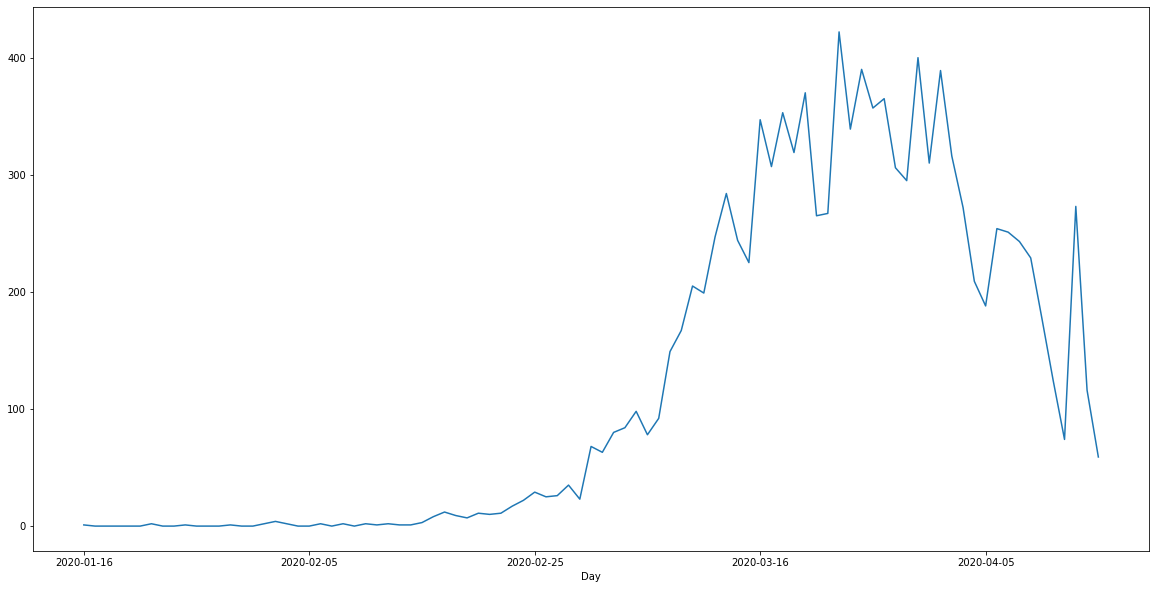

In [37]:
wa_epi.sum(axis=1).plot(figsize = (20,10))

In [38]:
wa_total = wa_epi.sum(axis=1)
wa_total[wa_total == wa_total.max()]

Day
2020-03-23    422
dtype: int64

In [39]:
nyt_data = pd.read_csv("covid-19-data/us-states.csv", parse_dates = ['date'])

In [40]:
nyt_epi = nyt_data.pivot_table(index='date', columns='state', values='cases', aggfunc=np.sum)

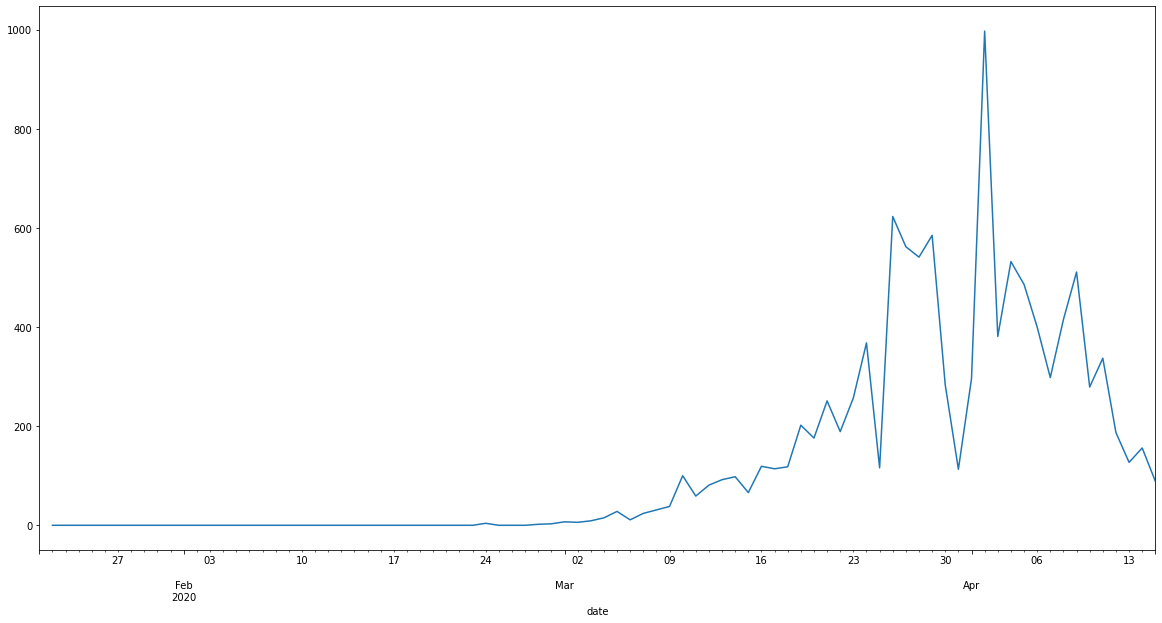

In [41]:
nyt_epi["Washington"].diff().plot(figsize=(20,10))

In [42]:
nyt_wa_epi = nyt_epi["Washington"].diff()

In [43]:
def max_row(data):
    return data[data == data.max()]

In [44]:
max_row(nyt_wa_epi)

date
2020-04-02    997.0
Name: Washington, dtype: float64

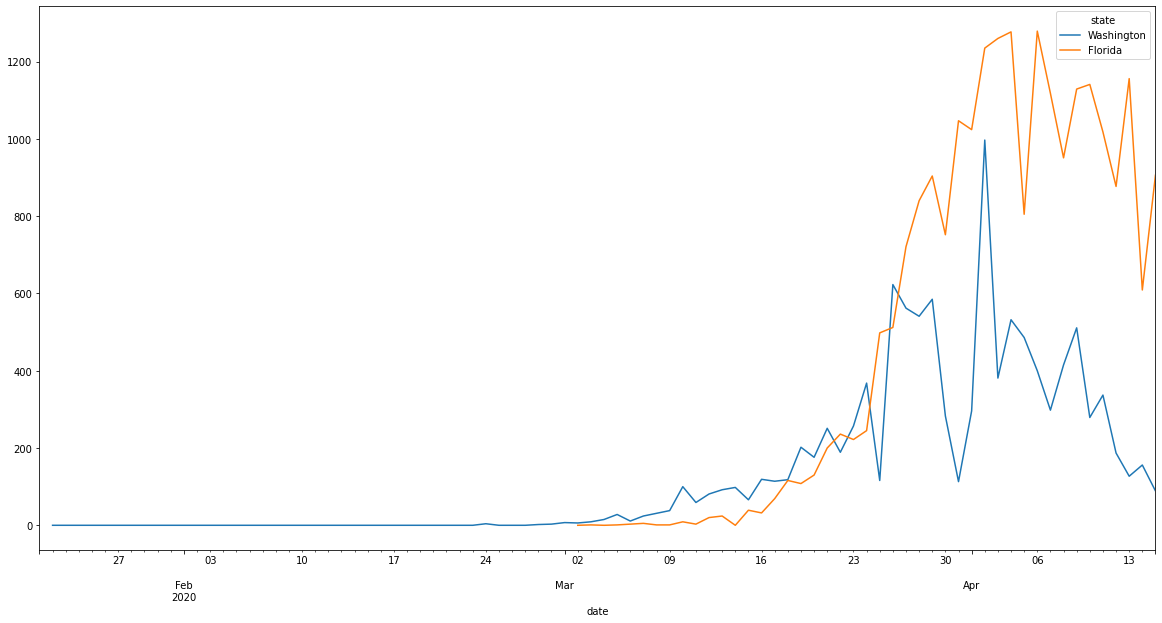

In [71]:
nyt_epi[['Washington', "Florida"]].diff().plot(figsize=(20,10))

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(nyt_epi.diff()) 
nyt_epi_norm = nyt_epi.copy()
nyt_epi_norm.loc[:,:] = scaled_values

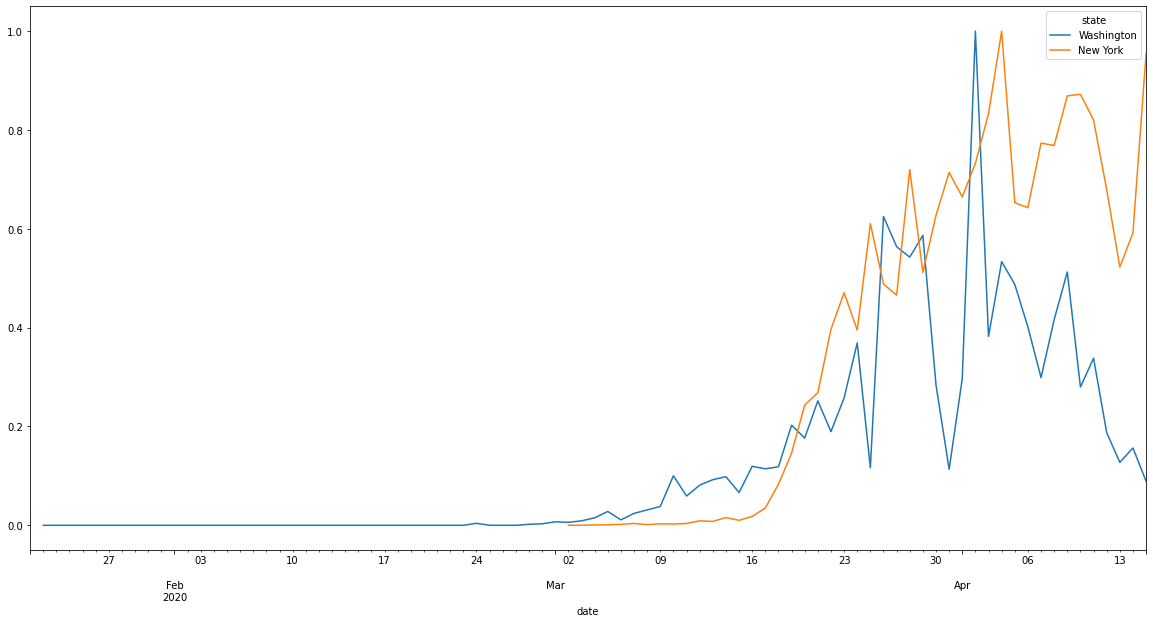

In [50]:
nyt_epi_norm[['Washington', 'New York']].plot(figsize=(20,10))

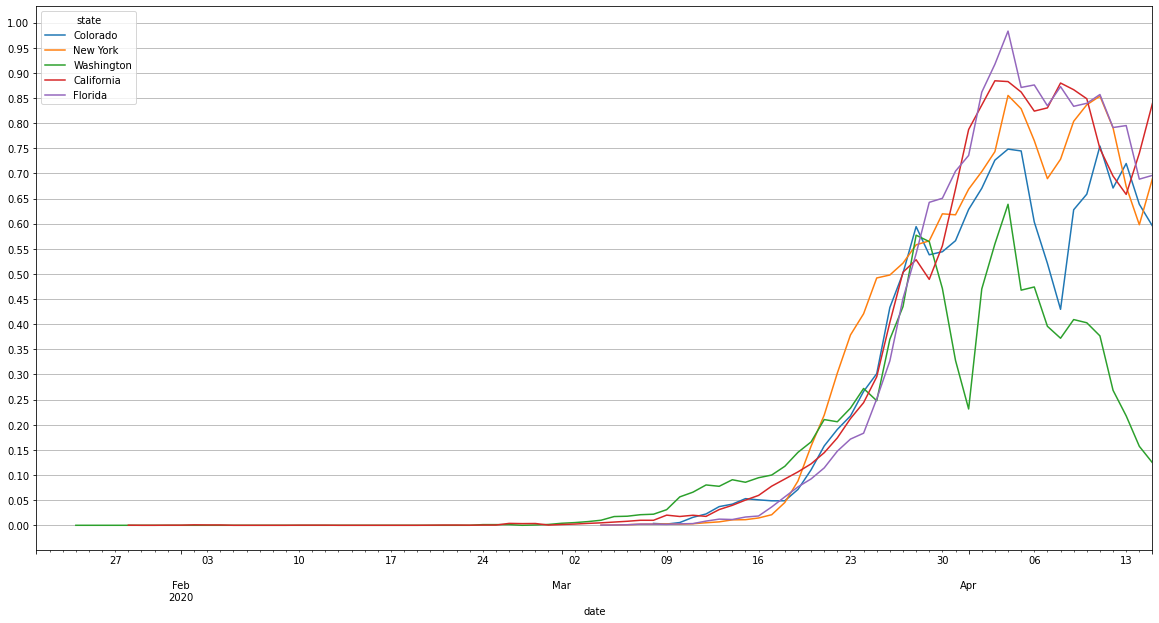

In [69]:
ax = nyt_epi_norm[['Colorado', 'New York', 'Washington', 'California', 'Florida']].rolling(3).mean().plot(figsize=(20,10))

loc = ticker.MultipleLocator(base=.05) # this locator puts ticks at regular intervals
ax.yaxis.set_major_locator(loc)
ax.grid(axis='y')

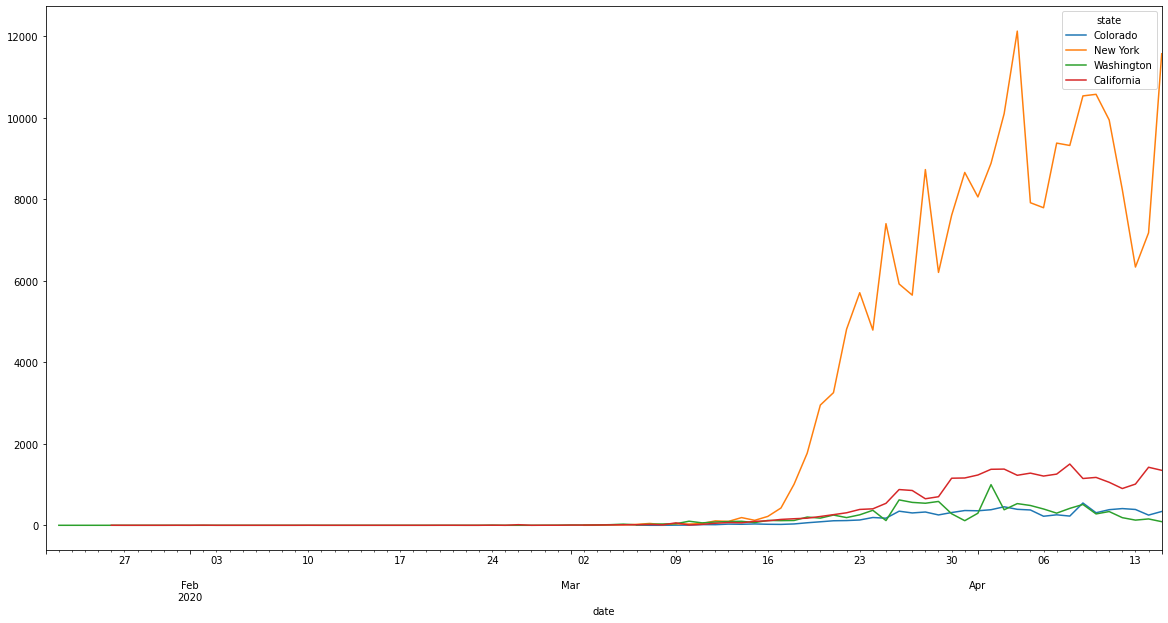

In [53]:
nyt_epi.diff()[['Colorado', 'New York', 'Washington', 'California']].plot(figsize=(20,10))

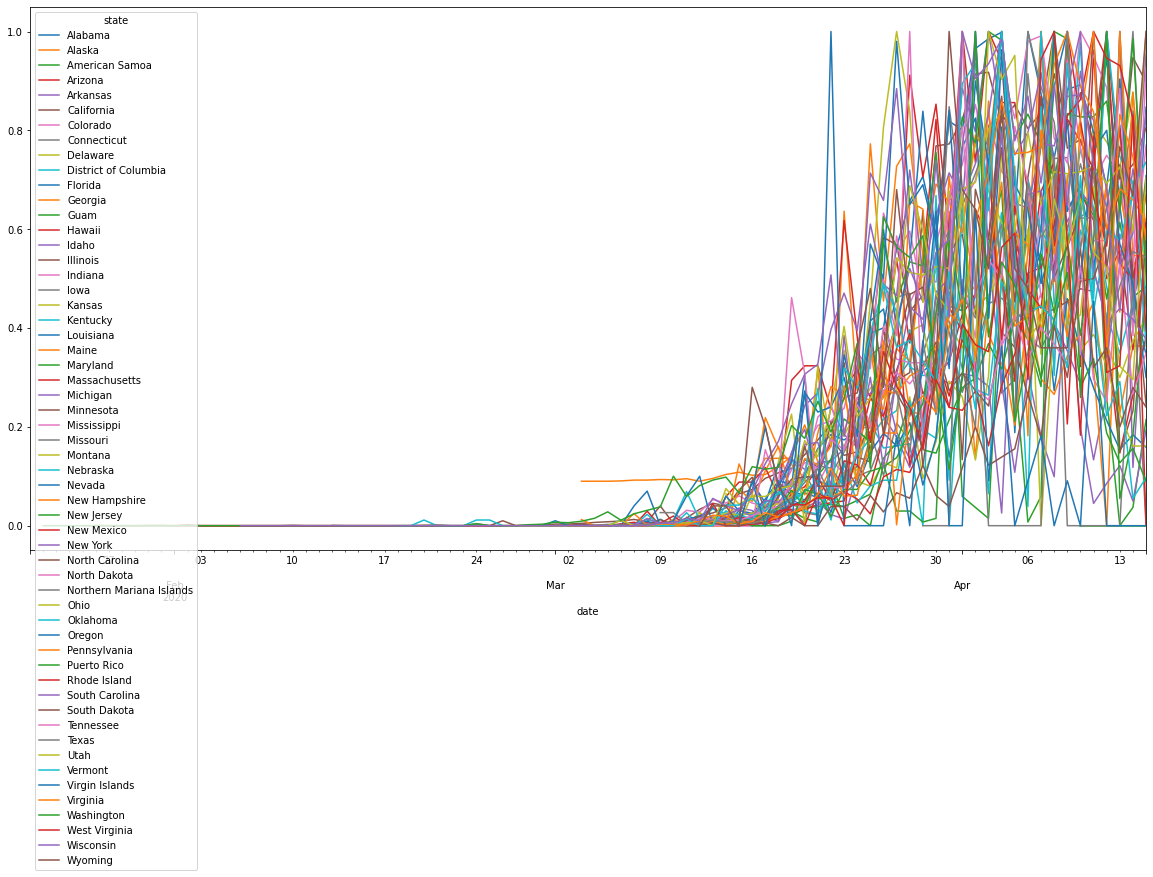

In [61]:
nyt_epi_norm.plot(figsize=(20,10))

In [126]:
mobility_raw = pd.read_csv("applemobilitytrends-2020-04-16.csv")

In [160]:
mobility = mobility_raw.melt(['geo_type', 'region', 'transportation_type'], var_name='Date', value_name='Mobility')

mobility['Date'] = pd.to_datetime(mobility['Date'])

mobility.set_index('Date')

mobility_pivot = pd.pivot_table(mobility, values='Mobility', columns=['geo_type', 'region'], index='Date')

In [161]:
mobility_pivot

geo_type          city                                                        \
region       Amsterdam   Athens     Atlanta    Auckland   Baltimore  Bangkok   
Date                                                                           
2020-01-13  100.000000  100.000  100.000000  100.000000  100.000000  100.000   
2020-01-14  100.693333  100.100  102.940000  103.676667  103.426667  100.615   
2020-01-15  101.956667  101.290  106.153333  105.090000  112.336667  105.375   
2020-01-16  105.343333  106.595  108.683333  104.563333  110.963333  104.710   
2020-01-17  123.880000  117.660  118.336667   96.353333  122.550000  129.890   
...                ...      ...         ...         ...         ...      ...   
2020-04-12   22.270000   32.395   33.453333   13.786667   44.246667   26.920   
2020-04-13   23.256667   34.010   53.613333   13.660000   50.130000   26.695   
2020-04-14   25.993333   35.305   55.883333   13.893333   56.140000   26.900   
2020-04-15   29.430000   34.340   57.050000   14.276667   59.843333   27.680   
2020-04-16   30.680000   36.315   57.253333   15.453333   58.286667   29.025   

geo_type                                                              ...  \
region       Barcelona      Berlin Birmingham - UK Bochum - Dortmund  ...   
Date                                                                  ...   
2020-01-13  100.000000  100.000000      100.000000        100.000000  ...   
2020-01-14   96.820000  105.790000      104.933333        103.730000  ...   
2020-01-15   97.420000  107.653333      107.633333        107.030000  ...   
2020-01-16  101.793333  111.916667      105.233333        104.196667  ...   
2020-01-17  119.896667  123.556667      109.223333        110.160000  ...   
...                ...         ...             ...               ...  ...   
2020-04-12    7.640000   40.136667       26.206667         65.563333  ...   
2020-04-13    9.106667   34.530000       30.390000         65.513333  ...   
2020-04-14   11.696667   41.770000       37.310000         69.683333  ...   
2020-04-15   11.926667   43.590000       38.520000         76.696667  ...   
2020-04-16   12.040000   47.266667       37.783333         78.663333  ...   

geo_type   country/region                                                     \
region        Switzerland      Taiwan Thailand   Turkey          UK  Ukraine   
Date                                                                           
2020-01-13     100.000000  100.000000  100.000  100.000  100.000000  100.000   
2020-01-14     104.146667  107.500000  100.130  102.095  105.066667  102.780   
2020-01-15     110.426667  117.450000  106.950  105.365  108.713333  108.810   
2020-01-16     107.356667  120.826667  107.160  107.560  106.920000  102.850   
2020-01-17     115.516667  135.960000  133.350  136.585  115.880000  108.080   
...                   ...         ...      ...      ...         ...      ...   
2020-04-12      46.936667   69.150000   28.370   17.615   24.300000   50.775   
2020-04-13      52.623333   64.743333   28.220   40.480   27.383333   57.775   
2020-04-14      52.933333   67.140000   29.465   38.020   33.486667   56.660   
2020-04-15      57.116667   68.076667   29.320   36.815   34.990000   56.055   
2020-04-16      57.706667   73.370000   30.315   40.970   34.436667   58.050   

geo_type                                                         
region     United Arab Emirates United States  Uruguay  Vietnam  
Date                                                             
2020-01-13              100.000    100.000000  100.000  100.000  
2020-01-14              102.260    100.110000   95.870  104.700  
2020-01-15               96.800    101.966667   85.470  108.435  
2020-01-16              109.510    102.706667  101.970  107.290  
2020-01-17              115.115    118.300000  109.975  118.850  
...                         ...           ...      ...      ...  
2020-04-12               50.510     30.226667   19.590   45.950  
2020-04-13         

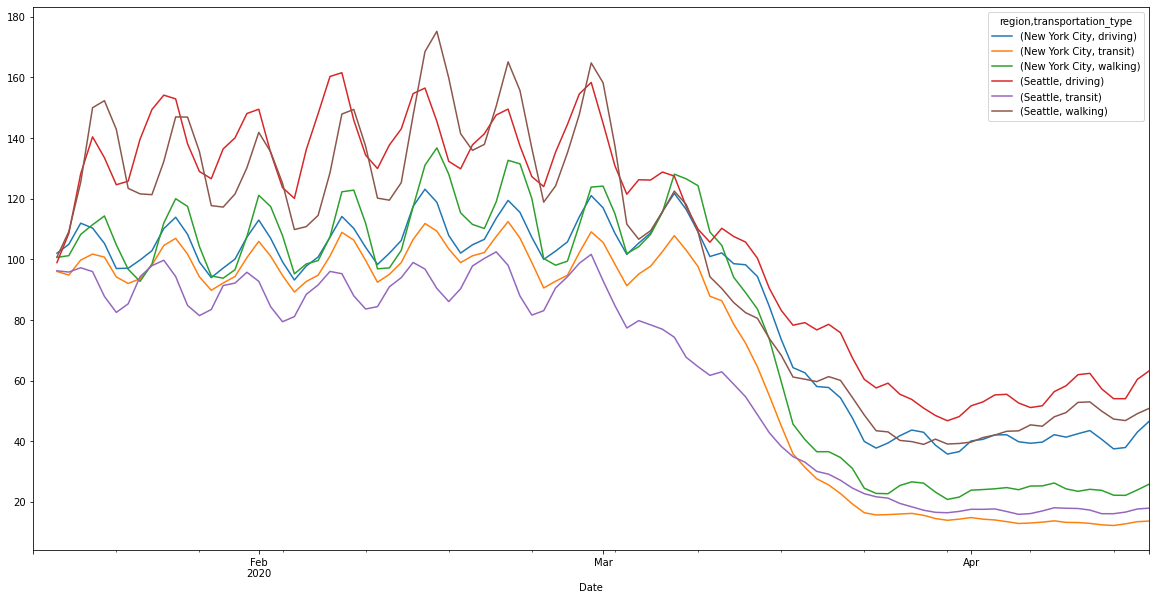

In [153]:
mobility_pivot[["New York City", "Seattle"]].rolling(3).mean().plot(figsize=(20,10))

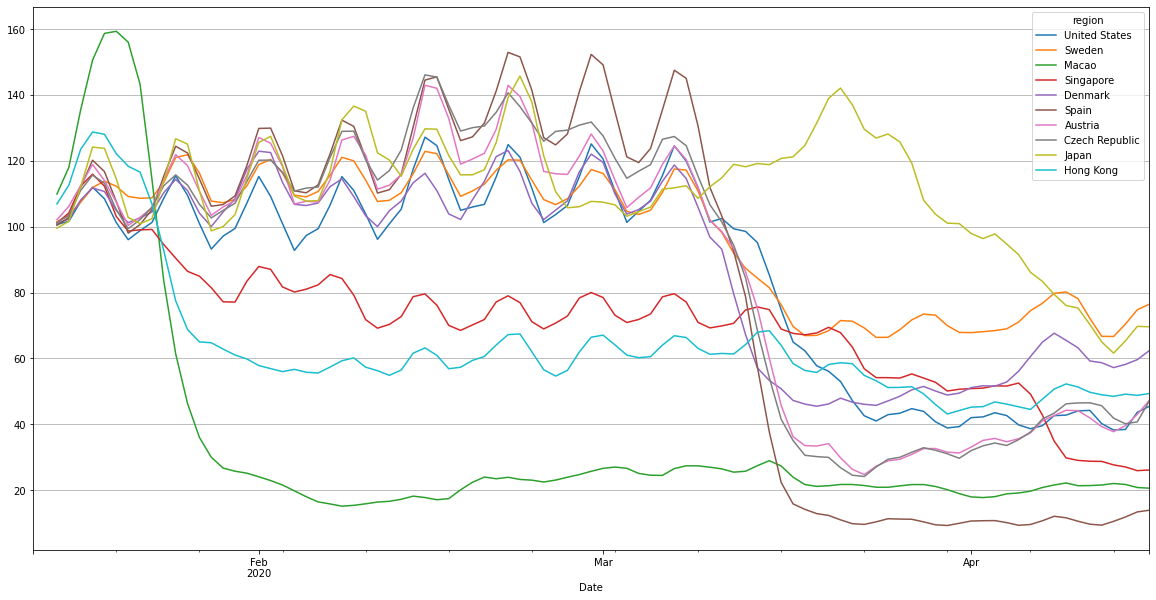

In [192]:
ax = mobility_pivot['country/region'][['United States', 'Sweden', 'Macao', 'Singapore', 'Denmark', 'Spain', "Austria", 'Czech Republic', 'Japan', 'Hong Kong']].rolling(3).mean().plot(figsize=(20,10))
ax.grid(axis='y')

In [172]:
mobility_pivot.iloc[30,:].min()

16.884999999999998

In [174]:
mobility_pivot.iloc[30,:][mobility_pivot.iloc[30,:].min() == mobility_pivot.iloc[30,:]]

geo_type        region
country/region  Macao     16.885
Name: 2020-02-12 00:00:00, dtype: float64

In [188]:
sorted(mobility_pivot['country/region'].columns)

['Albania',
 'Argentina',
 'Australia',
 'Austria',
 'Belgium',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Canada',
 'Chile',
 'Colombia',
 'Croatia',
 'Czech Republic',
 'Denmark',
 'Egypt',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Macao',
 'Malaysia',
 'Mexico',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Philippines',
 'Poland',
 'Portugal',
 'Republic of Korea',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Serbia',
 'Singapore',
 'Slovakia',
 'Slovenia',
 'South Africa',
 'Spain',
 'Sweden',
 'Switzerland',
 'Taiwan',
 'Thailand',
 'Turkey',
 'UK',
 'Ukraine',
 'United Arab Emirates',
 'United States',
 'Uruguay',
 'Vietnam']

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.optimize import curve_fit
import datetime as dt
import matplotlib.pyplot as plt

In [5]:
us_data = pd.read_csv("covid-tracking-data/data/us_daily.csv", index_col="date", parse_dates=["date"])[::-1]

start = pd.to_datetime("20200228")

us_data = us_data[us_data.index >= start]

In [6]:
def fit(x, y, target_date, days_back, f, p0, title, backtest_date=None):
    
    if backtest_date is not None:
        # If we're doing a backtest, truncate the data.
        last_day = pd.Timestamp(backtest_date).to_julian_date() - us_data.index[0].to_julian_date()
        backtest_x = x[:int(last_day)]
        backtest_y = y[:int(last_day)]
    else:
        backtest_x = x
        backtest_y = y

    target = pd.Timestamp(target_date).to_julian_date() - us_data.index[0].to_julian_date()

    plt.figure(figsize=(20,10))
    plt.plot(x, y, label="Actual", linewidth=3)

    predictions = []
    params=p0
    for n_days_back in days_back:
        params, _ = curve_fit(f, backtest_x[-n_days_back:], backtest_y[-n_days_back:], p0=params, maxfev=100000)
        print(params)
        x_projection = np.linspace(backtest_x[-n_days_back],target,100)
        plt.plot(x_projection, f(x_projection, *params), label="Last %d Days" % n_days_back, linestyle='dashed')
        prediction = f(target, *params)
        print("Prediction fitting on %d days back: %d" % (n_days_back, prediction))
        predictions.append(prediction)
    print("Average prediction: %d" % np.average(predictions))
    plt.legend()
    plt.title(title)
    plt.yscale('linear')
    plt.show()
    if backtest_date is not None:
        error = np.average(predictions) - y[int(target)]
        print("Distance from actual: %d" % error)
    
    return predictions

In [7]:
us_data.index[0]



Timestamp('2020-02-28 00:00:00')

[ 1.04433464e+06  4.26330318e+01  1.31704425e-01 -1.91720336e+04]
Prediction fitting on 57 days back: 903271
[ 1.10744933e+06  4.29588208e+01  1.20900590e-01 -4.11763986e+04]
Prediction fitting on 47 days back: 911655
[ 1.32651608e+06  4.36334190e+01  9.55858898e-02 -1.30631679e+05]
Prediction fitting on 37 days back: 927800
Average prediction: 914242


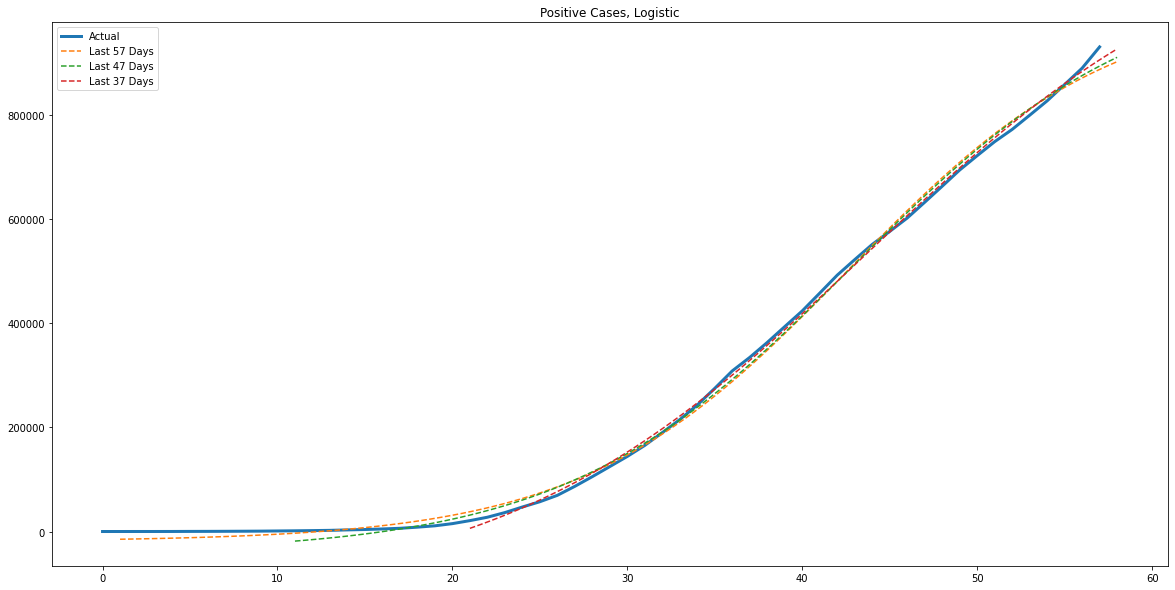

[903271.4556218383, 911655.8775660923, 927800.159328508]

In [8]:
us_data['days_since_start'] = us_data.index.to_julian_date() - us_data.index[0].to_julian_date()

def f(x,A,x0,k,off):
    return A / (1 + np.exp(-k*(x-x0)))+off

fit(us_data['days_since_start'],
    us_data['positive'],
    '2020-04-26',
    (57,47, 37),
    f,
    (us_data['positive'][-1] - us_data['positive'][0], 40, 0.1, -1000),
    "Positive Cases, Logistic")

[  28770.08343893 -719241.31115212]
Prediction fitting on 9 days back: 949423
[  30044.32140402 -789163.9272457 ]
Prediction fitting on 7 days back: 953406
[  32563.89994542 -928994.49699835]
Prediction fitting on 5 days back: 959711
[   36190. -1132696.]
Prediction fitting on 3 days back: 966324
Average prediction: 957216


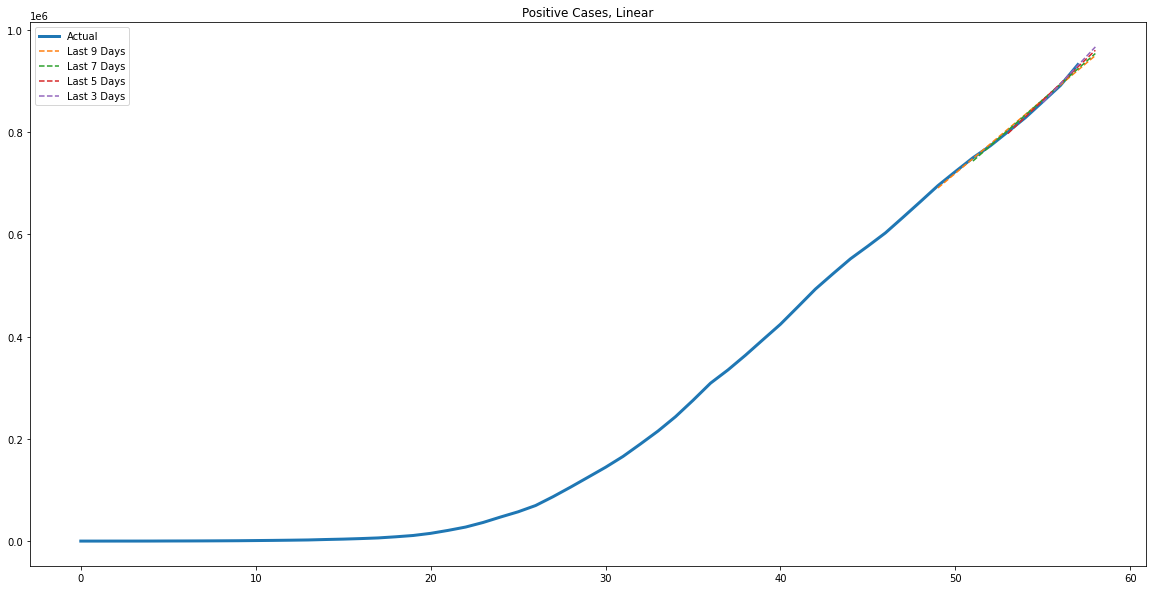

[949423.5283057553, 953406.7141875123, 959711.6998362738, 966324.0]

In [9]:
def f(x, *coeffs):
   return np.polyval(coeffs, x)

fit(us_data['days_since_start'],
    us_data['positive'],
    '2020-04-26',
    (9, 7, 5, 3),
    f,
    np.ones(2),
    "Positive Cases, Linear")

In [10]:
import statsmodels.tsa as sm

In [94]:
es = sm.holtwinters.ExponentialSmoothing(
    us_data[us_data.index >= pd.to_datetime('2020-03-15')]['positive'],
    trend="add",
    freq='D',
    damped=True,
)

fit1 = es.fit(optimized=True)

fit1.summary()

/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


Dep. Variable:,endog,No. Observations:,42
Model:,ExponentialSmoothing,SSE,375604072.114
Optimized:,True,AIC,682.268
Trend:,Additive,BIC,690.956
Seasonal:,None,AICC,685.562
Seasonal Periods:,None,Date:,"Sat, 25 Apr 2020"
Box-Cox:,False,Time:,23:51:37
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_slope,1.0000000,beta,True


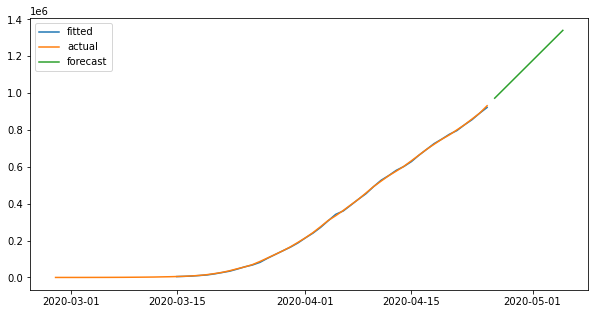

In [95]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(fit1.fittedvalues, label="fitted")
ax.plot(us_data['positive'], label="actual")

ax.plot(fit1.forecast(10), label="forecast")
plt.legend()

#fit1.params_formatted

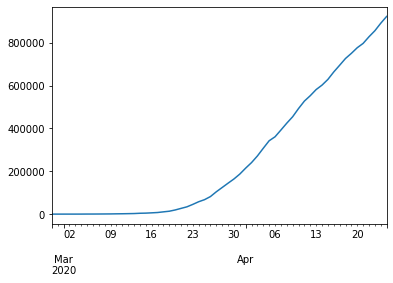

In [46]:
fit1.predict(start=0).plot()

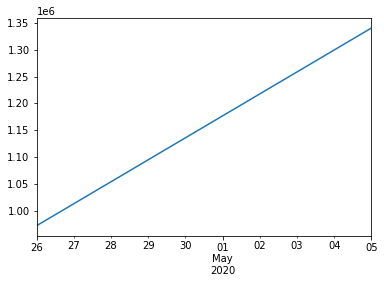

In [48]:
fit1.forecast(10).plot()

In [105]:
us_states = pd.read_csv("covid-tracking-data/data/states_daily_4pm_et.csv", parse_dates=['date'], index_col='date')[::-1]

In [106]:
us_states

,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,53,NaN,NaN,NaN,NaN,NaN
2020-01-23,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,53,0.0,0.0,0.0,0.0,0.0
2020-01-24,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,53,0.0,0.0,0.0,0.0,0.0
2020-01-25,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,53,0.0,0.0,0.0,0.0,0.0
2020-01-26,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,53,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-25,AZ,6280.0,56228.0,NaN,697.0,1022.0,313.0,NaN,191.0,NaN,...,1022.0,62508.0,62508.0,62508.0,4,0.0,38.0,1559.0,235.0,1794.0
2020-04-25,AS,0.0,3.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,20.0,3.0,3.0,60,0.0,0.0,0.0,0.0,0.0
2020-04-25,AR,2829.0,35224.0,NaN,104.0,291.0,NaN,NaN,25.0,57.0,...,291.0,38053.0,38053.0,38053.0,5,2.0,0.0,2387.0,88.0,2475.0


In [111]:
ga_data = us_states[us_states['state'] == 'GA']
ga_data

,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,,
2020-03-04,GA,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,2.0,2.0,13,NaN,NaN,NaN,NaN,NaN
2020-03-05,GA,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,2.0,2.0,13,0.0,0.0,0.0,0.0,0.0
2020-03-06,GA,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,2.0,2.0,13,0.0,0.0,0.0,0.0,0.0
2020-03-07,GA,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.0,6.0,6.0,13,0.0,0.0,0.0,4.0,4.0
2020-03-08,GA,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.0,7.0,7.0,13,0.0,0.0,0.0,1.0,1.0
2020-03-09,GA,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,12.0,12.0,12.0,13,0.0,0.0,0.0,5.0,5.0
2020-03-10,GA,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,17.0,17.0,17.0,13,0.0,0.0,0.0,5.0,5.0
2020-03-11,GA,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,22.0,22.0,22.0,13,0.0,0.0,0.0,5.0,5.0
2020-03-12,GA,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,31.0,31.0,31.0,13,0.0,0.0,0.0,9.0,9.0


In [127]:
ga_data['positive'].diff().fillna(value=0)

date
2020-03-04       0.0
2020-03-05       0.0
2020-03-06       0.0
2020-03-07       4.0
2020-03-08       1.0
2020-03-09       5.0
2020-03-10       5.0
2020-03-11       5.0
2020-03-12       9.0
2020-03-13      11.0
2020-03-14      24.0
2020-03-15      33.0
2020-03-16      22.0
2020-03-17      25.0
2020-03-18      51.0
2020-03-19      90.0
2020-03-20     133.0
2020-03-21      87.0
2020-03-22      93.0
2020-03-23     172.0
2020-03-24     254.0
2020-03-25     221.0
2020-03-26     278.0
2020-03-27     476.0
2020-03-28     365.0
2020-03-29     285.0
2020-03-30     158.0
2020-03-31    1120.0
2020-04-01     709.0
2020-04-02     710.0
2020-04-03     483.0
2020-04-04     329.0
2020-04-05     487.0
2020-04-06     667.0
2020-04-07    1504.0
2020-04-08    1083.0
2020-04-09     665.0
2020-04-10     917.0
2020-04-11     676.0
2020-04-12     293.0
2020-04-13     863.0
2020-04-14     908.0
2020-04-15     764.0
2020-04-16     682.0
2020-04-17    1525.0
2020-04-18     475.0
2020-04-19     632.0
2020-04-

In [139]:
es = sm.holtwinters.ExponentialSmoothing(
    ga_data['positive'].diff().fillna(value=0),
    trend="add",
    freq='D',
    damped=True,
)

fit1 = es.fit(optimized=True)

fit1.summary()

/home/beala/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


Dep. Variable:,endog,No. Observations:,53
Model:,ExponentialSmoothing,SSE,3357281.785
Optimized:,True,AIC,595.987
Trend:,Additive,BIC,605.838
Seasonal:,None,AICC,598.475
Seasonal Periods:,None,Date:,"Sun, 26 Apr 2020"
Box-Cox:,False,Time:,00:33:30
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1753231,alpha,True
smoothing_slope,0.1753231,beta,True


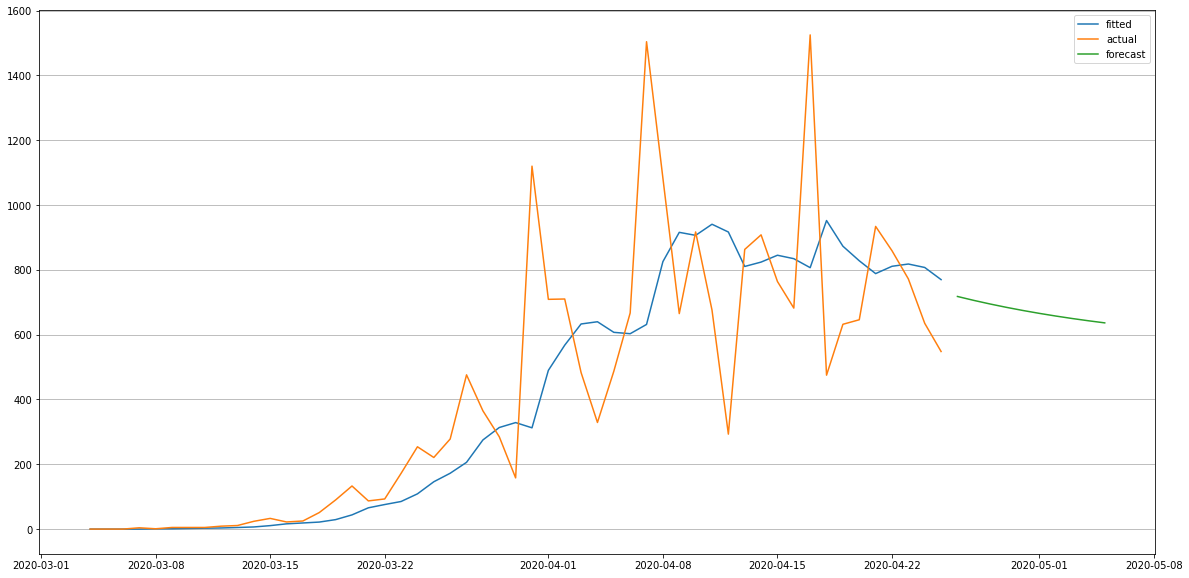

In [140]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(fit1.fittedvalues, label="fitted")
ax.plot(ga_data['positive'].diff().fillna(value=0), label="actual")

ax.plot(fit1.forecast(10), label="forecast")
plt.legend()
plt.grid(axis='y')

plt.savefig("ga_daily_cases.png", transparent=False)
#fit1.params_formatted

In [141]:
es = sm.holtwinters.ExponentialSmoothing(
    ga_data['positive'],
    trend="mul",
    freq='D',
    damped=True,
)

fit1 = es.fit(optimized=True)

fit1.summary()

Dep. Variable:,endog,No. Observations:,53
Model:,ExponentialSmoothing,SSE,2721244.030
Optimized:,True,AIC,584.854
Trend:,Multiplicative,BIC,594.706
Seasonal:,None,AICC,587.343
Seasonal Periods:,None,Date:,"Sun, 26 Apr 2020"
Box-Cox:,False,Time:,00:34:32
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_slope,0.000000,beta,True


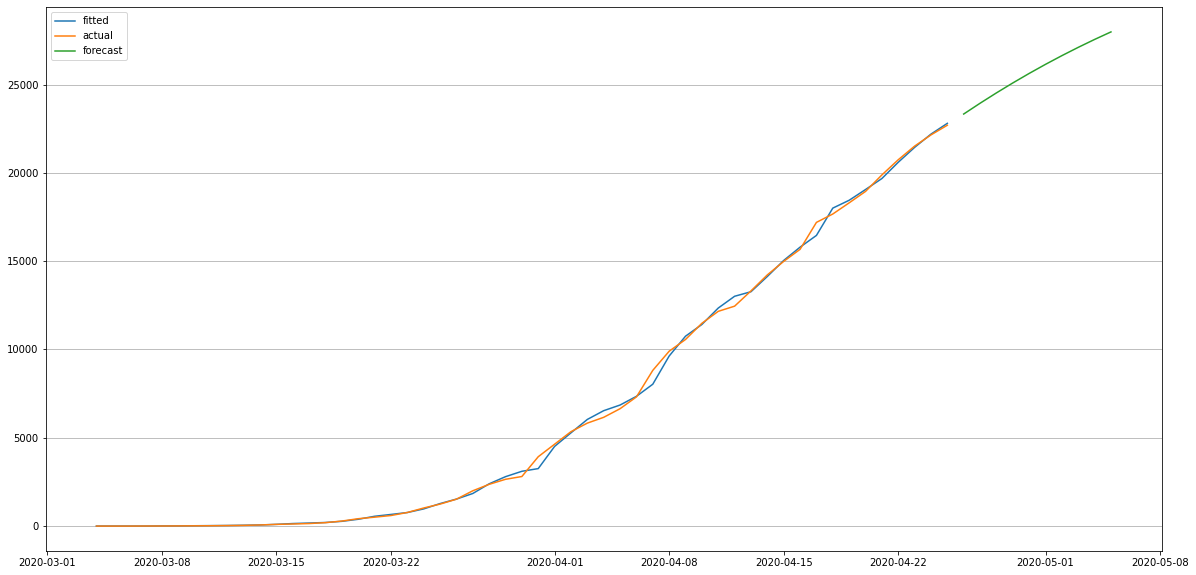

In [144]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(fit1.fittedvalues, label="fitted")
ax.plot(ga_data['positive'], label="actual")

ax.plot(fit1.forecast(10), label="forecast")
plt.legend()
plt.grid(axis='y')

plt.savefig("ga_total_cases.png", transparent=False)